# **Predicting the Sales Volume of the Google Stock Price Dataset**

## **Data Preprocessing**

### **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Importing the Dataset set**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/Google_Stock_Price.csv', header=0, index_col=0,  sep=',' , thousands=',',parse_dates = True)
print(dataset.head(10))

              Open    High     Low   Close    Volume
Date                                                
2012-01-03  325.25  332.83  324.97  663.59   7380500
2012-01-04  331.27  333.87  329.08  666.45   5749400
2012-01-05  329.83  330.75  326.89  657.21   6590300
2012-01-06  328.34  328.77  323.68  648.24   5405900
2012-01-09  322.04  322.29  309.46  620.76  11688800
2012-01-10  313.70  315.72  307.30  621.43   8824000
2012-01-11  310.59  313.52  309.40  624.25   4817800
2012-01-12  314.43  315.26  312.08  627.92   3764400
2012-01-13  311.96  312.30  309.37  623.28   4631800
2012-01-17  314.81  314.81  311.67  626.86   3832800


### **Handling/Checking for Missing Values**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
print("Number of rows in Google_Stock_Price dataset = {rows} ".format(rows = len(dataset)))

Number of rows in Google_Stock_Price dataset = 1258 


**Checking for Missing Values**

In [ ]:
missing_values = dataset.isnull().mean()*100
missing_values.sum()

0.0

**Note :** In Google_Stock_Price dataset there are 1258  rows and all are not null and the percentage of missing values for each column is 0.0 Therefore there are no missing values in Google_Stock_Price dataset .

**Checking for Duplicate rows**

In [ ]:
isDuplicate = dataset.duplicated().any()
if isDuplicate :
  print("Is there any duplicate value present in Google_Stock_Price dataset : YES")
else :
 print("Is there any duplicate value present in Google_Stock_Price dataset : NO")

Is there any duplicate value present in Google_Stock_Price dataset : NO


### **Handling /Checking Outliers**

In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


**Boxplot Analysis before outlier removal**

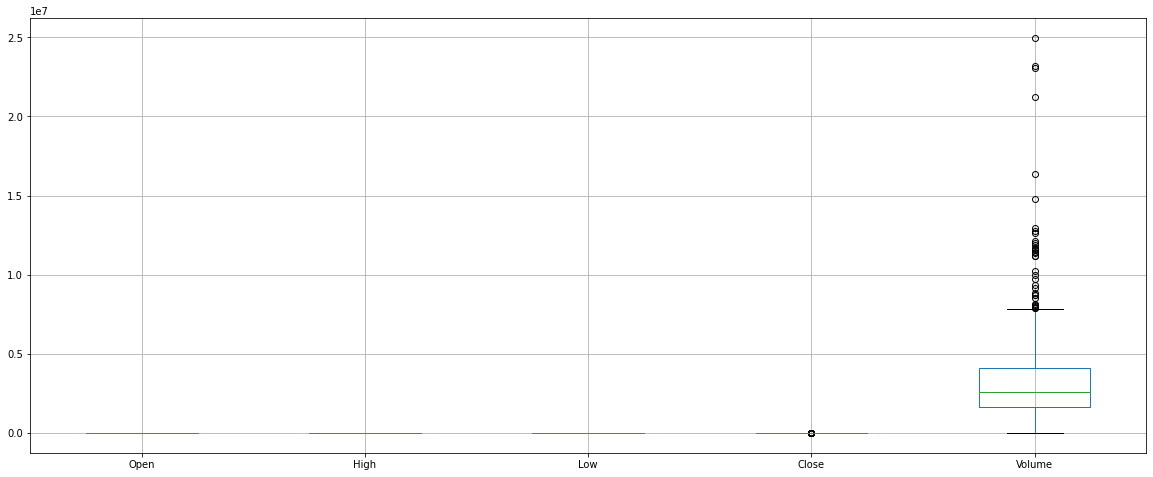

In [ ]:
dataset.boxplot(figsize=(20,8))

In [ ]:
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400
2016-12-27,790.68,797.86,787.66,791.55,789100
2016-12-28,793.70,794.23,783.20,785.05,1153800


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(dataset))
print(z)

[[1.37285476 1.34065332 1.35579373 0.29801768 1.85777584]
 [1.33320882 1.33385362 1.32848349 0.28065141 1.14012166]
 [1.34269224 1.35425271 1.34303566 0.33675781 1.51010229]
 ...
 [1.71221829 1.67605855 1.68906636 0.43950216 0.88185833]
 [1.64392454 1.62179174 1.66062649 0.42577916 1.06203085]
 [1.64010483 1.6011965  1.60407899 0.35916799 0.6107416 ]]


In [ ]:
type(z)

numpy.ndarray

In [ ]:
z.shape

(1258, 5)

In [ ]:
dataset.shape

(1258, 5)

**Detecting the Outliers**

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  4,  11,  12,  15,  69,  70,  71,  95, 138, 182, 184, 185, 201,
       202, 264, 324, 387, 451, 521, 522, 533, 537, 538, 539, 540, 541,
       543, 544, 545, 546, 547, 553, 889]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4]))


In [ ]:
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


**Removing the Outliers**

In [ ]:
(z < 3).all(axis=1)

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
dataset_new = dataset[(z < 3).all(axis=1)]
dataset_new.shape

(1225, 5)

**Boxplot Analysis after outlier removal**

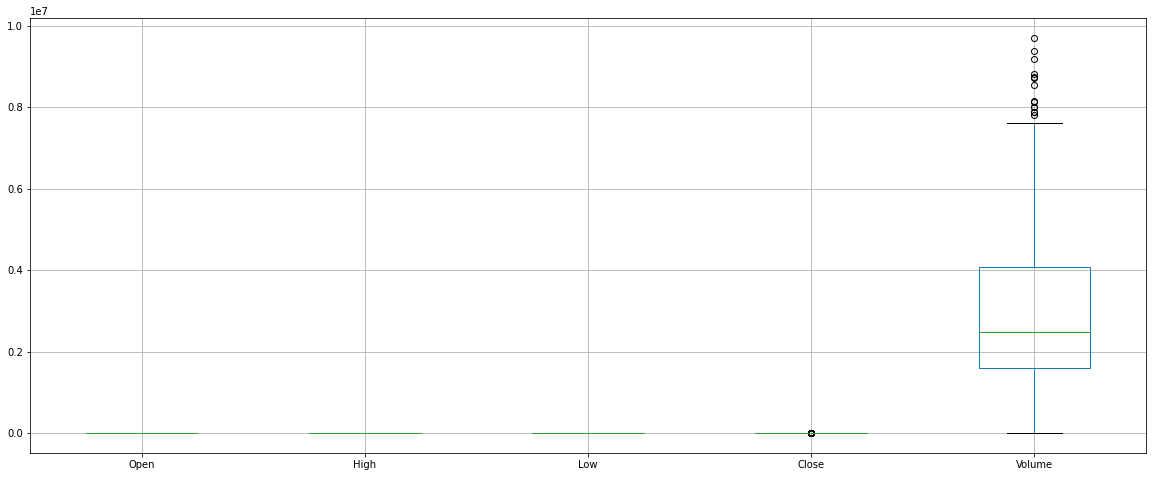

In [ ]:
dataset_new.boxplot(figsize=(20,8))

### **PCA (Principal Components Analysis) and Feature Analyasis**

**Principal Components Analysis**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(dataset_new)
ratio_sum = pca.explained_variance_ratio_.cumsum()
ratio_sum

array([0.99999998, 0.99999999, 1.        , 1.        , 1.        ])

In [ ]:
pca = PCA(n_components = 1)
pca.fit(dataset_new[['Volume']])
ratio_sum = pca.explained_variance_ratio_.cumsum()
ratio_sum

array([1.])

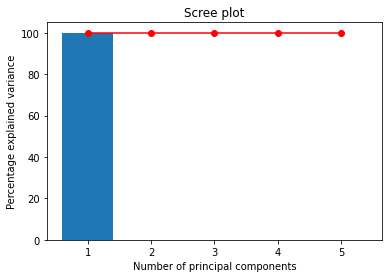

In [ ]:
 scree = pca.explained_variance_ratio_*100
 plt.bar(np.arange(len(scree))+1, scree)
 plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
 plt.xlabel("Number of principal components")
 plt.ylabel("Percentage explained variance")
 plt.title("Scree plot")
 plt.show(block=False)

**Note :** In above tests we can see using all 5 features, that mean reducing to only one dimention gives 0.99999998 explained_variance_ratio cumlative and using all 5 features gives 1 and according to above Scree plot using 1 or 2 features are recomonded 

**Feature Analyasis**

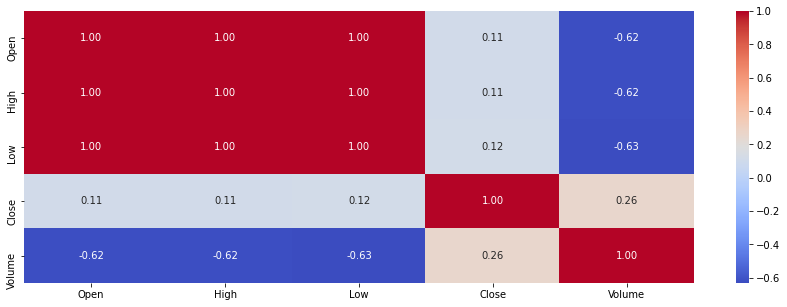

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(dataset_new.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

**Note :** all Low , High and Open are highly correlated but -.6 correation with volume but not good one

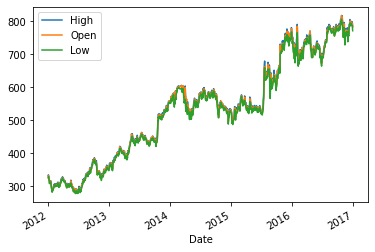

In [ ]:
dataset_new[['High','Open','Low']].plot.line()

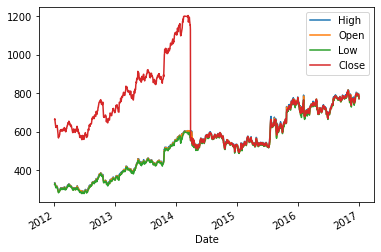

In [ ]:
dataset_new[['High','Open','Low','Close']].plot.line()

**Note :** close feature has an unusually high value 2012 to 2013 that is much higher than the high value therefore reliability of close feature is quite problematic 

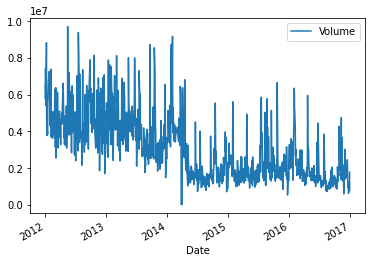

In [ ]:
dataset_new[['Volume']].plot.line()

**Note :** As we need to Predict the Sales Volume and when compare to other features volume has less correlation with other data.and volume is a timeseries data so we can use voule as a Sequence prediction by using supervised learning approch to Predict the Sales Volume so for that we use LSTM Model to desgin our Nural network model  

### **Preparing Dataset**

In [ ]:
series = dataset_new.astype(float)

**Note :**  As we use RNN / LSTM  approch to pedict sales volume we can use only volume feature and use LSTM model to do an time series analysis 

In [ ]:
series = series.sort_index()

In [ ]:
print(series)

              Open    High     Low   Close     Volume
Date                                                 
2012-01-03  325.25  332.83  324.97  663.59  7380500.0
2012-01-04  331.27  333.87  329.08  666.45  5749400.0
2012-01-05  329.83  330.75  326.89  657.21  6590300.0
2012-01-06  328.34  328.77  323.68  648.24  5405900.0
2012-01-10  313.70  315.72  307.30  621.43  8824000.0
...            ...     ...     ...     ...        ...
2016-12-23  790.90  792.74  787.28  789.91   623400.0
2016-12-27  790.68  797.86  787.66  791.55   789100.0
2016-12-28  793.70  794.23  783.20  785.05  1153800.0
2016-12-29  783.33  785.93  778.92  782.79   744300.0
2016-12-30  782.75  782.78  770.41  771.82  1770000.0

[1225 rows x 5 columns]


**Train/Test/Validation Set Splitting**

In [ ]:
import datetime as dt

train_start = dt.date(2012,1,1)
train_end = dt.date(2015,12,31)
train_data = series.loc[train_start:train_end].iloc[:, 4:5].values

validation_start = dt.date(2016,1,1)
validation_end = dt.date(2016,6,30)
validation_data = series.loc[validation_start:validation_end].iloc[:, 4:5].values

test_start = dt.date(2016,7,1)
test_end = dt.date(2016,12,31)
test_data = series.loc[test_start:test_end].iloc[:, 4:5].values

print(train_data.shape,validation_data.shape,test_data.shape)

(973, 1) (125, 1) (127, 1)


### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(train_data)
validation_set_scaled = sc.transform(validation_data)
test_set_scaled = sc.transform(test_data)

print(training_set_scaled.shape,validation_set_scaled.shape,test_set_scaled.shape)

(973, 1) (125, 1) (127, 1)


In [ ]:
print(training_set_scaled)

[[7.60187247e-01]
 [5.92004867e-01]
 [6.78709890e-01]
 [5.56586653e-01]
 [9.09026231e-01]
 [4.95947785e-01]
 [3.87331931e-01]
 [4.76769364e-01]
 [3.94384641e-01]
 [5.70826116e-01]
 [7.05621546e-01]
 [6.31702136e-01]
 [6.66975996e-01]
 [7.47968737e-01]
 [4.81574280e-01]
 [4.42629712e-01]
 [4.79543017e-01]
 [4.98999835e-01]
 [6.55035882e-01]
 [7.60826528e-01]
 [4.32215623e-01]
 [3.79289367e-01]
 [4.67953477e-01]
 [4.80471006e-01]
 [3.75134043e-01]
 [3.72535676e-01]
 [5.01319805e-01]
 [5.23055349e-01]
 [5.06114411e-01]
 [5.12682504e-01]
 [4.06335066e-01]
 [4.24544255e-01]
 [3.99828838e-01]
 [3.74639116e-01]
 [5.88602244e-01]
 [6.48488410e-01]
 [4.62354615e-01]
 [3.24837087e-01]
 [3.28971789e-01]
 [6.56252578e-01]
 [2.60919327e-01]
 [2.77674668e-01]
 [5.51967335e-01]
 [3.44644477e-01]
 [4.64035305e-01]
 [6.07089829e-01]
 [5.03217025e-01]
 [6.30609173e-01]
 [4.48929720e-01]
 [3.18042151e-01]
 [5.10362534e-01]
 [4.98071847e-01]
 [4.00777448e-01]
 [3.75732080e-01]
 [4.14656026e-01]
 [5.247051

### **Creating a Traning and Validation data structures with (30 / 40 / 50) timesteps and 1 output**

**Preparing Traning  and Validation Dataset**

In [ ]:
X_train = []
y_train = []
for i in range(30, 973):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_validation = []  
y_validation = []
for i in range(30, 125):
    X_validation.append(validation_set_scaled[i-30:i, 0])
    y_validation.append(validation_set_scaled[i, 0])
X_validation, y_validation = np.array(X_validation), np.array(y_validation)

In [ ]:
print(X_train.shape)

(943, 30)


In [ ]:
print(X_validation.shape)

(95, 30)


 **Reshaping Traning and Validation Dataset**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(943, 30, 1)


In [ ]:
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
print(X_validation.shape)

(95, 30, 1)


## **Building and Training the RNN**

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 96, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 65,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 55,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 34,activation='tanh',return_sequences = False))
regressor.add(Dropout(0.1))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss='mse', metrics=['mae'])

In [ ]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 96)            37632     
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 96)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 65)            42120     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 65)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 55)            26620     
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 55)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 34)               

**Fitting Data to Model**

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_validation, y_validation))

Epoch 1/100
30/30 [==============================] - 11s 137ms/step - loss: 0.0419 - mae: 0.1534 - val_loss: 0.0098 - val_mae: 0.0826
Epoch 2/100
30/30 [==============================] - 2s 73ms/step - loss: 0.0172 - mae: 0.0955 - val_loss: 0.0115 - val_mae: 0.0888
Epoch 3/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0171 - mae: 0.0963 - val_loss: 0.0089 - val_mae: 0.0700
Epoch 4/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0191 - mae: 0.0973 - val_loss: 0.0085 - val_mae: 0.0674
Epoch 5/100
30/30 [==============================] - 2s 75ms/step - loss: 0.0167 - mae: 0.0905 - val_loss: 0.0119 - val_mae: 0.0890
Epoch 6/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0164 - mae: 0.0921 - val_loss: 0.0097 - val_mae: 0.0790
Epoch 7/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0175 - mae: 0.0957 - val_loss: 0.0087 - val_mae: 0.0695
Epoch 8/100
30/30 [==============================] - 2s 74ms/step - loss: 

**Preparing Test Dataset**

In [ ]:
inputs = test_set_scaled
X_test = []
y_test = []
for i in range(30, 127):
    X_test.append(inputs[i-30:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
X_test.shape

(97, 30, 1)

##**Making the predictions and visualising the results**

### **Getting the predicted stock volume**

In [ ]:
predicted_value = regressor.predict(X_test)  
predicted_stock_volume = sc.inverse_transform(predicted_value)

**Fixing 1-lag transform of the sequence**

In [ ]:
predicted_stock_volume.shape

(97, 1)

**shift the values in array from last point and repace that last point of value with last value of array** 

In [ ]:
from scipy.ndimage.interpolation import shift

predicted_stock_volume = predicted_stock_volume.ravel()
array_length = len(predicted_stock_volume)
last_element = predicted_stock_volume[array_length - 1]
predicted_stock_volume = shift(predicted_stock_volume, -1, cval=last_element)
predicted_stock_volume = np.reshape(predicted_stock_volume,(predicted_stock_volume.shape[0], 1))


In [ ]:
predicted_stock_volume.shape

(87, 1)

In [ ]:
stock_volume = y_test.reshape(-1,1)
real_stock_volume = sc.inverse_transform(stock_volume)

In [ ]:
print(real_stock_volume)

### **Evaluating Model performance in diffrence perceptions**

####**Evaluate the model for 100 epochs and 50 timesteps**

**Before Fixing 1-lag transform of the sequence**

In [ ]:

from numpy import sqrt
mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 0.004, RMSE: 0.066, MAE: 0.048


In [ ]:
from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

R2 Score:  0.2266817793371212

R2 Score:  0.2266817528952294


 **Note :** When we observe the R2 Score it had 22.66% accurracy which is very low. Need fine tune model or check for issues. 

**After Fixing 1-lag transform of the sequence**

In [ ]:
from numpy import sqrt
from sklearn.metrics import r2_score

# mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
# print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

d = real_stock_volume - predicted_stock_volume
mse = np.mean(d**2)
mae = np.mean(abs(d))

print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
print('')
print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

MSE: 99696452131.470, RMSE: 315747.450, MAE: 213090.209

R2 Score:  0.8113194498033985

R2 Score:  0.2520010330020507


**Note :** After fixing issue of 1-lag transform of the sequence we got accuracy of 81.13% . But as we didnt change fix 1-lag issue in scaled data we can see the accuracy for that is 25.20%. So we can conclude that after fixing 1-lag issue accuracy of model with 100 epoch and 50 timesteps increase by 55.93%

####**Evaluate the model for 100 epochs and 40 timesteps**

**Before Fixing 1-lag transform of the sequence**

In [ ]:
from numpy import sqrt
mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 0.004, RMSE: 0.062, MAE: 0.043


In [ ]:
from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

R2 Score:  0.26572243029176523

R2 Score:  0.26572244001043244


**After Fixing 1-lag transform of the sequence**

In [ ]:
from numpy import sqrt
from sklearn.metrics import r2_score

# mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
# print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

d = real_stock_volume - predicted_stock_volume
mse = np.mean(d**2)
mae = np.mean(abs(d))

print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
print('')
print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

MSE: 119892307813.247, RMSE: 346254.686, MAE: 244835.437

R2 Score:  0.7594437077291704

R2 Score:  0.1883833956672405


**Note :** After fixing issue of 1-lag transform of the sequence we got accuracy of 75.94% . But as we didnt change fix 1-lag issue in scaled data we can see the accuracy for that is 18.83%. So we can conclude that after fixing 1-lag issue accuracy of model with 100 epoch and 40 timesteps increase by 57.11%

####**Evaluate the model for 100 epochs and 30 timesteps**

**Before Fixing 1-lag transform of the sequence**

In [ ]:
from numpy import sqrt
mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 0.004, RMSE: 0.062, MAE: 0.043


In [ ]:
from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

R2 Score:  0.26572243029176523

R2 Score:  0.26572244001043244


**After Fixing 1-lag transform of the sequence**

In [ ]:
from numpy import sqrt
from sklearn.metrics import r2_score

# mse, mae = regressor.evaluate(X_test, y_test, verbose=0)
# print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

d = real_stock_volume - predicted_stock_volume
mse = np.mean(d**2)
mae = np.mean(abs(d))

print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
print('')
print('R2 Score: ', r2_score(real_stock_volume, predicted_stock_volume))
print('')
print('R2 Score: ', r2_score(stock_volume, predicted_value))

MSE: 92912440336.196, RMSE: 304815.420, MAE: 197445.470

R2 Score:  0.80945283637062

R2 Score:  0.2746503347466841


**Note :** After fixing issue of 1-lag transform of the sequence we got accuracy of 80.94% . But as we didnt change fix 1-lag issue in scaled data we can see the accuracy for that is 27.46%. So we can conclude that after fixing 1-lag issue accuracy of model with 100 epoch and 30 timesteps increase by 53.48%

**Conclusion** : Model for 100 epochs and 50 timesteps after fixing the 1-lag issue gives the higest accuracy as  81.13% as R2 Score 

### **Visualising the results**

####**Real Stock Volume VS Predicted Stock Volume line charts**

##### **For 50 timesteps**

######**Before changing the LSTM Network Compostion**

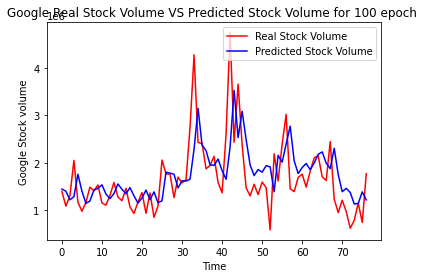

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

######**After changing the LSTM Network Compostion**

**Before Fixing 1-lag transform of the sequence**

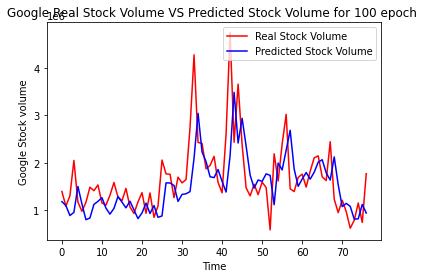

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

**After Fixing 1-lag transform of the sequence**

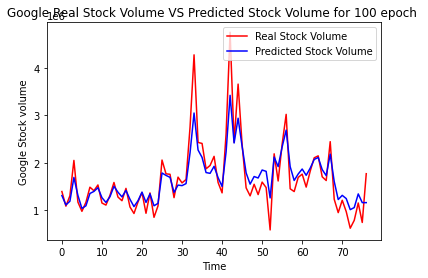

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

#####**For 40 timesteps**

**Before Fixing 1-lag transform of the sequence**

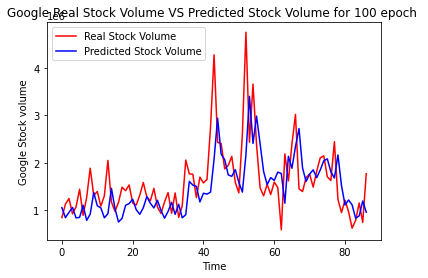

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

**After Fixing 1-lag transform of the sequence**

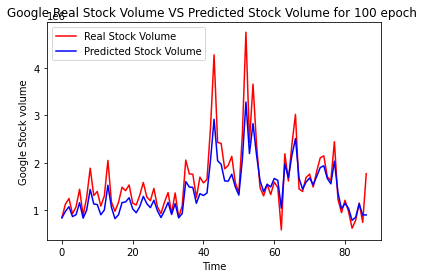

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

#####**For 30 timesteps**

**Before Fixing 1-lag transform of the sequence**

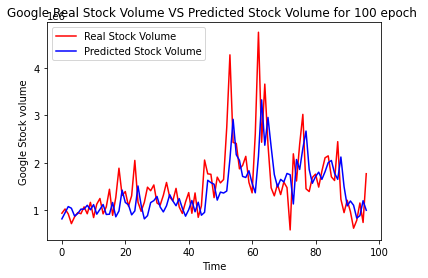

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

**After Fixing 1-lag transform of the sequence**

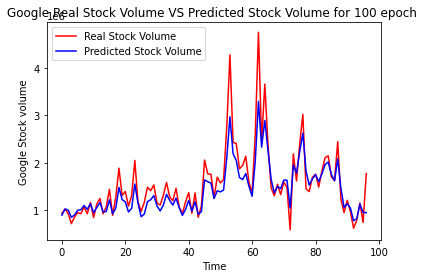

In [ ]:
plt.plot(real_stock_volume, color = 'red', label = 'Real Stock Volume')
plt.plot(predicted_stock_volume, color = 'blue', label = 'Predicted Stock Volume')
plt.title('Google Real Stock Volume VS Predicted Stock Volume for 100 epoch ')
plt.xlabel('Time')
plt.ylabel('Google Stock volume')
plt.legend()
plt.show()

####**Learning Curves**

**Learning Curves for 50 timesteps**

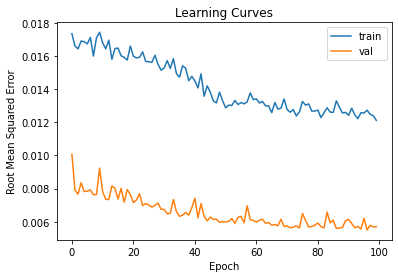

In [ ]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

**Learning Curves for 40 timesteps**

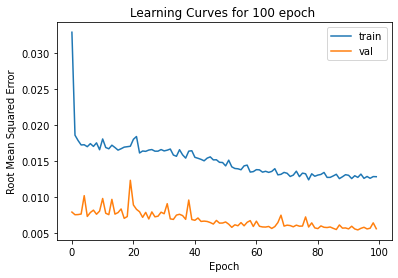

In [ ]:
pyplot.title('Learning Curves for 100 epoch ')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

**Learning Curves for 30 timesteps**

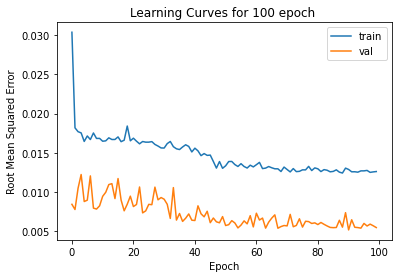

In [ ]:
pyplot.title('Learning Curves for 100 epoch ')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()